## 2.Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

 When should it be used? It assumes that the data are missing completely at random(MCAR)



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('titanic-main.csv',usecols=['Age','Fare','Survived'])
df.head(50)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [23]:
df['Age'].isnull().sum()

177

In [49]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
# Replace NAN value with some sampled value from the values


423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [21]:
cond=df['Age'].isnull()==True
print(cond)
df[cond].index


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool


Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [135]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [136]:
median=df.Age.median()
impute_nan(df,"Age",median)
df.head(50)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


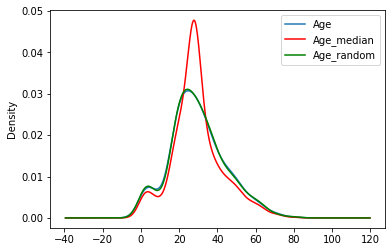

In [137]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages

Easy To implement
There is less distortion in variance



# Disadvantage
Every situation randomness wont work

## 3.Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [50]:
df=pd.read_csv('titanic-main.csv', usecols=['Age','Fare','Survived'])


In [51]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [145]:
df['Age'].fillna(df.Age.median(),inplace=True)
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


### Advantages
Easy to implement
Captures the importance of missing values


### Disadvantages
Creating Additional Features(Curse of Dimensionality)

# 4.End of Distribution imputation
 Outliers are handled easily

In [52]:
df=pd.read_csv('titanic-main.csv', usecols=['Age','Fare','Survived'])


<AxesSubplot:>

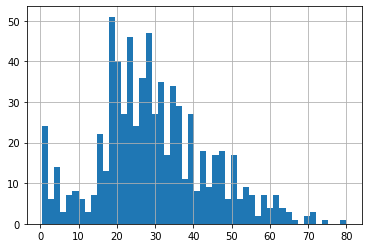

In [53]:
df.Age.hist(bins=50)


In [179]:
# Data at 3rd standard normal deviation.....most away from mean
# End values will be replaced
extreme=df.Age.mean()+3*df.Age.std()
print(extreme)

68.42067214450209


In [184]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [185]:
impute_nan(df,'Age',df.Age.median(),extreme)
df

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,28.0,23.4500,28.0
889,1,26.0,30.0000,26.0


<AxesSubplot:>

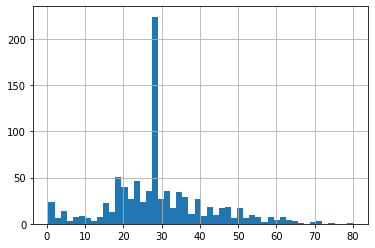

In [187]:
df['Age'].hist(bins=50)


<AxesSubplot:>

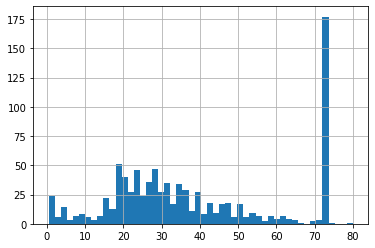

In [155]:
df['Age_end_distribution'].hist(bins=50)
